<a href="https://colab.research.google.com/github/Pulkit4761/Pytorch/blob/main/NeuralNets_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  import torch
  import torch.nn as nn
  import torch.nn.functional as F

In [ ]:
# Create a model class that inherits nn.Module
class Model(nn.Module):
  # Input layer (4 features of the flower)
  def __init__(self,input_features=4, h1=8, h2=9, output_features=3):
    super().__init__()
    self.fc1 = nn.Linear(input_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,output_features)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x


In [ ]:
# Pick a manual seed for randomization
torch.manual_seed(23)

#Create an instance of model
model = Model()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df = pd.read_csv(url)

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
df['species'] = df['species'].replace('setosa',0.0)
df['species'] = df['species'].replace('versicolor',1.0)
df['species'] = df['species'].replace('virginica',2.0)

<ipython-input-35-f2d7f6fde9b4>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['species'] = df['species'].replace('virginica',2.0)


In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [ ]:
# Train test split
x = df.drop('species',axis = 1)
y = df['species']

In [ ]:
#Converting to numpy arrays
x = x.values
y = y.values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Train test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=23)

In [ ]:
#Convert x features to float tensors
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)

In [ ]:
#Convert y labels to long tensors
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
#Criteria of model to measure the error
criterion = nn.CrossEntropyLoss()

#Choose Adam optimizer, learning rate
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [ ]:
#Train our model
epoches = 100
losses = []

for i in range(epoches):
  y_pred = model.forward(x_train)

  #Measure the loss/error
  loss = criterion(y_pred, y_train)

  #Keep track of losses
  losses.append(loss.detach().numpy())

  #print every 10 epoches
  if i % 10 == 0:
    print(f'Epoches: {i} and loss: {loss}')

  #Back propagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoches: 0 and loss: 1.067775011062622
Epoches: 10 and loss: 0.7801932692527771
Epoches: 20 and loss: 0.5400193929672241
Epoches: 30 and loss: 0.3965494930744171
Epoches: 40 and loss: 0.2741146683692932
Epoches: 50 and loss: 0.17554782330989838
Epoches: 60 and loss: 0.1180562749505043
Epoches: 70 and loss: 0.0900830551981926
Epoches: 80 and loss: 0.07610537111759186
Epoches: 90 and loss: 0.06832435727119446


Text(0.5, 0, 'Epoches')

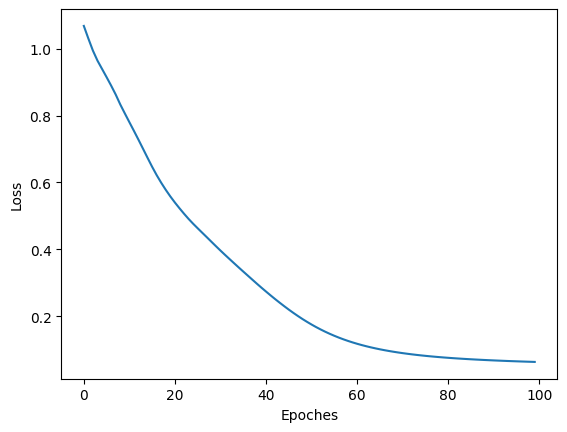

In [ ]:
#Graph
plt.plot(range(epoches),losses)
plt.ylabel('Loss')
plt.xlabel('Epoches')


In [ ]:
#Evalute the model on Test data set
with torch.no_grad():  # Turn off backpropagation
  y_eval = model.forward(x_test)
  loss = criterion(y_eval, y_test)

In [ ]:
loss

tensor(0.0589)

In [ ]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(x_test):
    y_val = model.forward(data)

    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.) {str(y_val)} \t{y_test[i]} \t{y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

  print(f'we got {correct} correct')

1.) tensor([-8.7715,  2.3075,  4.8800]) 	2 	2
2.) tensor([-8.8335,  2.5364,  4.6165]) 	2 	2
3.) tensor([-1.9098,  4.0244, -3.6844]) 	1 	1
4.) tensor([ 11.3545,   5.5519, -18.3873]) 	0 	0
5.) tensor([-9.6239,  1.2522,  7.0289]) 	2 	2
6.) tensor([-4.5352,  3.8281, -1.0531]) 	1 	1
7.) tensor([ 13.5446,   6.4994, -21.8418]) 	0 	0
8.) tensor([-8.3447,  2.1897,  4.6705]) 	2 	2
9.) tensor([ 12.8062,   6.2012, -20.7144]) 	0 	0
10.) tensor([-1.2333,  3.9878, -4.2723]) 	1 	1
11.) tensor([-4.1956,  3.4672, -0.8406]) 	1 	1
12.) tensor([ 11.5728,   5.6738, -18.7798]) 	0 	0
13.) tensor([-10.4121,   1.8762,   6.9583]) 	2 	2
14.) tensor([ 12.7668,   6.1021, -20.5085]) 	0 	0
15.) tensor([ 13.3847,   6.3627, -21.4714]) 	0 	0
16.) tensor([-6.5775,  2.7441,  2.3091]) 	2 	1
17.) tensor([-3.5527,  3.8516, -1.9650]) 	1 	1
18.) tensor([-4.8253,  3.2303,  0.0550]) 	1 	1
19.) tensor([-11.2645,   1.9321,   7.6379]) 	2 	2
20.) tensor([ 12.8334,   6.1422, -20.6333]) 	0 	0
21.) tensor([-9.6335,  1.6798,  6.5371]) 	

In [ ]:
#Save our NN model
torch.save(model.state_dict(),'iris_model.pt')

In [ ]:
#Load the saved model
new_model = Model()
new_model.load_state_dict(torch.load('iris_model.pt'))

<ipython-input-51-63c177c6dfeb>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('iris_model.pt'))


<All keys matched successfully>

In [ ]:
#Make sure the model loaded
new_model.eval()


Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)